In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The correct libraries must be imported in order to complete this task

The type of this input is <class 'numpy.ndarray'>
Shape: (1050, 1400, 3)


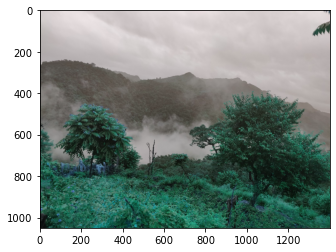

In [21]:
image = cv2.imread('trees.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)


cv2.imread() is used to read any image and determine its correct path.
The image is plotted using plt.imshow(), and the shape is also determined.
The colour is slightly different than the original picture, since OpenCV reads in the sequence blue, green, and red (BGR) unless directed otherwise.

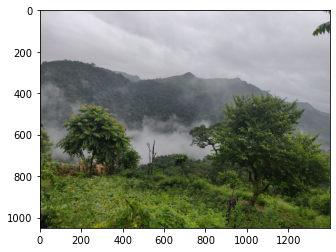

In [22]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

cv2.COLOUR_BGR2RGB converts from BGR to RGB. 
This will show the image in the original form.

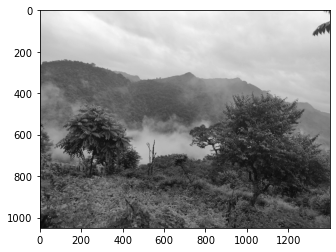

In [23]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

If you want the image to be shown in black and white, the image can be shown as gray using BGR2GRAY. 

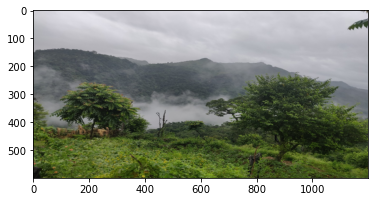

In [24]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

The image can also be resized to any specified size based on width and height using the method resize.

In [25]:
#Color Identification

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

The conversion RGB2HEX is used to create a pie chart. 
The colour (RGB) is read, and converted to HEX and displays the hex value in a pie chart. 

In [26]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

The image file is read using imread, then it's colour is changed using BGR2RGB.
The image is then opened in python in the RGB space.

In [27]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

This function allows the main colours from an image to be derived and displayed on a pie chart. 
KMeans creates clusters, which in this case will be clusters of the main colours. 
The counter function counts the occurence of all the labels.

[array([76.5189625 , 93.35855721, 37.85611331]),
 array([206.03032348, 205.72794349, 213.20182661]),
 array([28.75028803, 37.4075891 , 19.25223919]),
 array([119.52049684, 124.03633049, 123.69027937]),
 array([178.8741995 , 179.4478183 , 185.88665473]),
 array([82.67143143, 89.40641908, 90.61816178]),
 array([53.08448411, 65.66001327, 32.80712175]),
 array([107.28568079, 122.75816189,  55.42400797])]

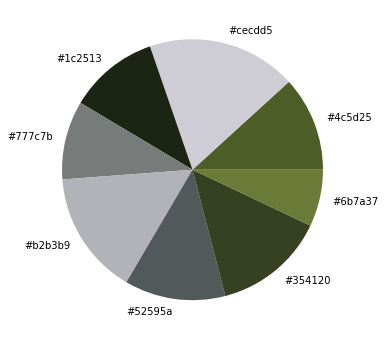

In [28]:
get_colors(get_image('trees.jpg'), 8, True)

The get_colors function creates a pie chart of the top 8 colours from the sample trees picture. 

In [29]:
#SEARCH IMAGES USING COLOUR

IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

There are a number of images in the folder "images", with the colours green, blue, and yellow.
All the images are read and their colours are stored in the images array.

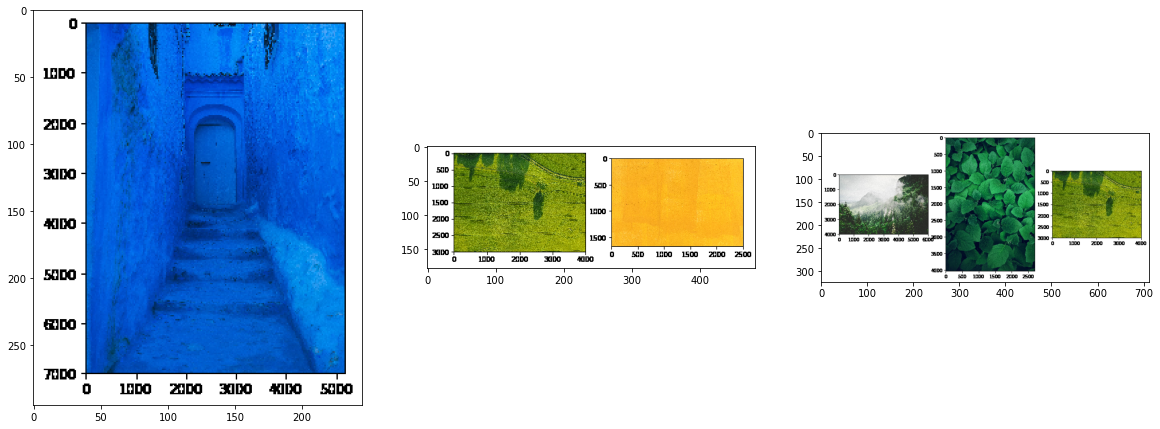

In [30]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [31]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

The function match_image_by_color filters through all the images in the folder and selects the ones that match the selected colour. 
The colours are extracted in the RGB format. RGB2LAB is then used to convert to a format in which the images can be compared. 


In [32]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

The function show_selected_images iterates through all the images, calls the function match_image_by_color, then displays the image on the screen. 
The following cells call the above function using various colours to search through images. 

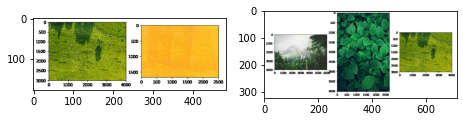

In [33]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)


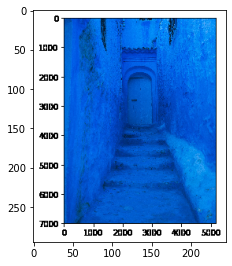

In [34]:
# Search for BLUE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)


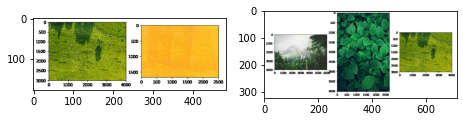

In [36]:
# Search for YELLOW
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)